# Assignment: BA model and scale-free networks

## 1. Implement BA algorithm
For this assignment you will be implementing the BA algorithm from the reading (see [Barabasi Ch 5.3](http://barabasi.com/networksciencebook/)). Create a function that takes `n` the number of nodes for the graph, and `m0` the initial number of nodes, as arguments and returns a networkx graph with a scale-free degree distribution.

The first step is figuring out how to do "preferential attachment" based on the degree of existing nodes. A brute-force way to do this is creating a huge list with duplicated items. Say, node 1's degree is 6, node 2's degree is 3, and node 3's degree is 2. (This is not a 'graphical' sequence. But for the sake of simplicity let's just assume that.) Then, we can create the following list to *preferentially sample* nodes from the network. 

In [1]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

1 is repeated 6 times, 2 is repeated 3 times, and so on. Now if we randomly sample from this list, we will be three times more like to sample node 1 than node 3!

In [6]:
import random

random.sample(alist, 1)

[1]

So, if you can maintain this list for your network, you can implement preferential attachment. Simply update this list whenever you add an edge! 

A more space-efficient way is using `numpy`'s sampling method. If you run the following cell, the documentation for the [`np.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function will appear. 

In [10]:
import numpy as np

np.random.choice?

It accepts `p` parameter and you can specifies the probability of each item in the list! So instead of creating

In [ ]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

You can do

In [12]:
nodes = [1,2,3]
degrees = [6,3,2]
sum_degrees = sum(degrees)
node_probs = [degree*1.0/sum_degrees for node, degree in zip(nodes,degrees)] 
node_probs

[0.5454545454545454, 0.2727272727272727, 0.18181818181818182]

In [13]:
np.random.choice(nodes, p=node_probs)

1

or sample two nodes from the list. 

In [14]:
np.random.choice(nodes, 2, replace=False, p=node_probs)

array([1, 3])

Ok, now the sampling can be done. How about the initial graph with `m0` nodes? `networkx` has a convenient function for that: https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html 

Can you create a complete graph with 5 nodes and then check the edges to make sure you have the right graph? 

In [17]:
# Implement ---


EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

Now you're ready to implement the BA algorithm! Create a fully-connected network with `m0` nodes. Then in each step, sample `m` nodes from the existing node pool. Add a new node and connect it to the chosen `m` nodes. 

In [35]:
def barabasi_albert_graph(n, m0, m=1):
    """Create a BA network with n nodes, where each new node connects to 
    m existing nodes according to the preferential attachment rule. The initial
    network is a clique (fully-connected network) with m0 nodes. 
    """
    # Initial network of m_o nodes (a complete graph)

    # Implement ---

    # ---

    # Until network has n nodes, 
    # 1. preferentially sample m nodes from the network,
    # 2. create a new node, 
    # 3. and connect the new node to the m selected nodes. 

    # Implement ---

    # ---
    return G        

## 2. BA graph analysis
Test your algorithm by creating a graph with `N = 1200` and `m0 = 7`. Calculate (and print) the average shortest path length of the graph:

In [36]:
# Implement ---


Calculate (and print) the average clustering coefficient of the graph:

In [37]:
# Implement ---


0.038268628777437814


The [cumulative distribution function (CDF) and complementary cumulative distribution function (CCDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) are among the most direct ways to identify a power-law-like distribution. Plot the **CCDF** of the graph's degree distribution. 

First, **CDF** for a discrete distribution is defined as the following:

$$ F_X(x) = P(X \le x) = \sum_{x' \le x} P(x') $$

CCDF is it's reverse and is defined as following:

$$\bar F_X(x) = P(X > x) = \sum_{x' > x} P(x') = 1 - F_X(x).$$

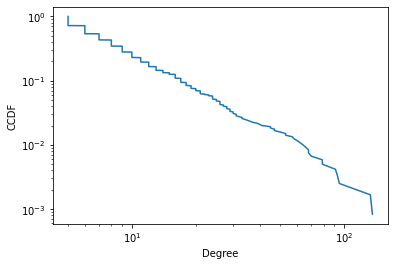

In [43]:
import matplotlib.pyplot as plt

# Implement ---
# ---

## 3. BA and ER comparison

Now let's compare the scale-free and random graphs. Create a random graph with the same number of nodes and about the same number of edges, then calculate the average shortest path length of that graph:

Note: Please extract the largest connected component (using networkx) and calculate the average path length of that component

In [ ]:
# Implement ---


Calculate (and print) the average clustering coefficient of the graph:

In [ ]:
# Implement ---

Now plot the CCDF of the degree distribution of the random graph:

In [ ]:
# Implement ---

How do the average shortest path lengths, average clustering coefficients, and degree distributions between the graphs compare?

(use this markdown cell for your response)

## 4. Preferential attachment without using the degree

As you know from the discussion and videos, it is possible to achieve the linear preferential attachment without calculating the degree by using the friendship paradox. Implement this version and see whether you can get a power-law degree distribution.  

In [ ]:
# Implement ---